<a href="https://colab.research.google.com/github/Baldros/Supervisioned-Learning/blob/main/DecisionTree_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apresentação:

    O objetivo desse código é começar a estudar modelos
    de arvode de decisão para classificação.

    Arvores de Decisão mantém-se dentro da pespectiva de
    aprendizado supervisionado, porém agora trabalhando
    a ideia de modelos não lineares.

    Um ponto positivo das Arvores de Decisão é que elas
    não necessitam que as features sejam escalonadas.

# Preparando os dados de estudo:

In [ ]:
from sklearn import datasets
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
for met in dir(datasets):
  if 'load' in met:
    print(met)

__loader__
load_breast_cancer
load_diabetes
load_digits
load_files
load_iris
load_linnerud
load_sample_image
load_sample_images
load_svmlight_file
load_svmlight_files
load_wine


In [ ]:
dataset = datasets.load_breast_cancer();dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
df_data = pd.DataFrame(dataset.data, columns=dataset.feature_names);
df_target = pd.DataFrame(dataset.target, columns=["Target"])

df = pd.concat([df_data,df_target],axis=1);df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
# Criando uma nova coluna com base na condição
df['Tipo'] = df['Target'].apply(lambda x: 'malignant' if x == 1 else 'benign')

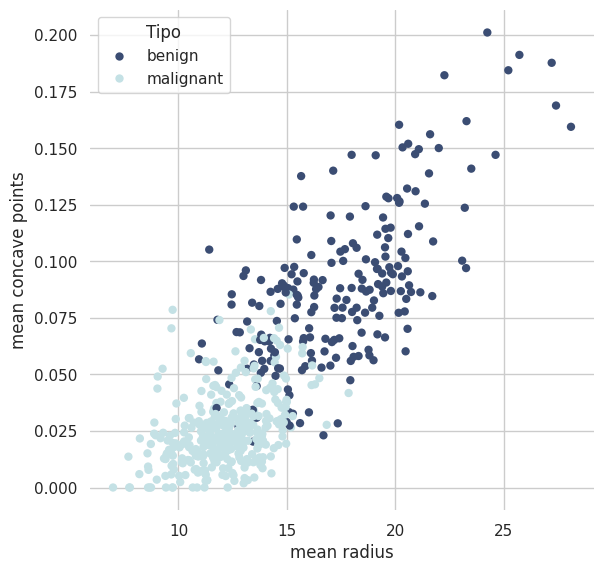

In [ ]:
# Visualização:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="mean radius", y="mean concave points",
                hue="Tipo",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)
plt.show()

# Arvore de Decisões:

    Basicamente, a grosso modo, uma Arvore de Decisões
    nada mais é do que uma sequência de If-Else que filtram
    a resposta de acordo com certos parâmetros. A ideia é
    estalecer alguma forma de Treshold (Limite) e calcula-lo
    e antes do Treshold é uma coisa, depois, é outra.

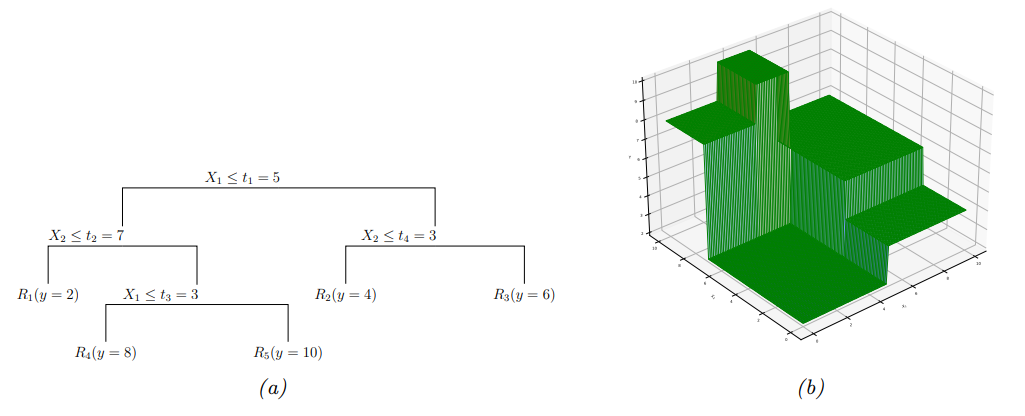

Fonte: Probabilistic Machine Learning An Introduction
Kevin P. Murphy


In [ ]:
# Importações Sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Pegando as informações:
X = df.drop(['Target','Tipo'],axis=1).values
y = df.Target.values

In [ ]:
# Splitando os dados:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=1)

Parametro stratify:

    O parâmetro stratify serve para que os
    conjuntos de treinamento e teste
    tenham a mesma proporção de rótulos de
    classes que conjunto de dados não divido.

In [ ]:
# Instanciando o modelo:
dt = DecisionTreeClassifier(max_depth=2,random_state=1)

Parâmetro max_depth:

    É uma árvore, ou seja, ela pode
    aqui definimos a altura da árvore.

Parâmetro random_state:

    Aqui definimos a reprodutibilidade
    do modelo.

In [ ]:
# Ajustando o modelo:
dt.fit(X_train, y_train)

# Realizando a predição do conjunto set:
y_pred = dt.predict(X_test)

# Avaliando o modelo:
metrica = accuracy_score(y_test, y_pred)

print(f'Métrica da Árvore de Decisão: {metrica}')

Métrica da Árvore de Decisão: 0.9298245614035088


**Nota**

    Lembrando que aqui temos a acurácia...

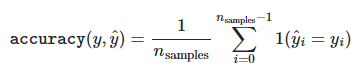

    Cujo sabemos que pode não ser a melhor métrica
    de acurácia para modelos de classificação. O ideial
    para problemas de classificação é trabalhar com
    métricas que discretizem os erros, começando
    pela visualização da matríz de confusão.

**Entendendo o Resultado**

    uma Árvore de Decisão para classificação produz regiões de decisão
    retangulares no espaço de características. Isso acontece
    porque a cada divisão feita pela árvore, apenas um recurso
    está envolvido.


# Regressão Logistica vs Árvore de Decisão:

In [ ]:
# Importando o modelo de Regressão Logística:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Instanciando o Modelo:
logreg = LogisticRegression(random_state=1)

# Ajustando o modelo de Regressão Logistica:
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [ ]:
try:
  # Define a list called clfs containing the two classifiers logreg and dt
  clfs = [logreg, dt]

  # Review the decision regions of the two classifiers
  plot_labeled_decision_regions(X_test, y_test, clfs)
except:
  print('Pass')

Pass


# Ganho de Informação (IG):

    Definido como uma árvore funciona, vamos agora definir como
    ela refinar mais o processo de aprendizado dela.

    O "Information Gain" (ganho de informação) é um conceito
    fundamental na construção de árvores de decisão, ele representa
    a medida de quanta informação sobre a classe de um conjunto de
    dados é obtida ao dividir esse conjunto com base em um
    determinado atributo. O critério de divisão escolhido é aquele
    que maximiza o Information Gain, ou seja, que proporciona a
    maior redução na incerteza sobre a classe dos dados.

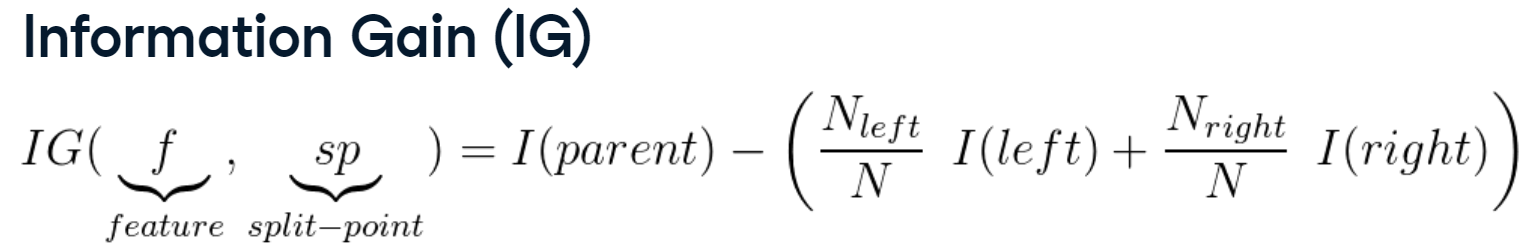


In [ ]:
# Instanciando o modelo:
dt = DecisionTreeClassifier(max_depth=2, criterion = "gini", random_state=1)

In [ ]:
# Ajustando o modelo:
dt.fit(X_train, y_train)

# Realizando a predição do conjunto set:
y_pred = dt.predict(X_test)

# Avaliando o modelo:
metrica = accuracy_score(y_test, y_pred)

print(f'Métrica da Árvore de Decisão: {metrica}')

Métrica da Árvore de Decisão: 0.9298245614035088


**Nota**

    Nas árvores do Sklearn, o critério "gini", indice de gini,
    já vem como padrão.